# importing the libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# importing the training file

In [2]:
df = pd.read_json("/kaggle/input/convolve-epoch1/train.json", orient="index").reset_index()
# renaming columns
df.rename(mapper={
        "index": "features",
        0: "label"
    }, 
    axis="columns",
    inplace=True)

# Preprocessing

In [3]:
columns = [0, 1, 2, 3, 9]
df[columns] = df.features.str.split(n=4, expand=True)

In [4]:
df[9] = df.apply(lambda x: x[9].split(" ", 1)[1] if x[2] != "-" else x[9], axis="columns")

In [5]:
split = df[9].str.split(n=4, expand=True)
df[4] = split[0] + " " + split[1] + " " + split[2] 
df[9] = split[3] + " " + split[4]

In [6]:
df.rename(mapper={
        0: "ErrorId",
        2: "ErrorCode",
        3: "TimeStamp",
        9: "Details",
        4: "ErrorType"
},
    axis="columns",
    inplace=True)
df["Abnormal"] = df["label"].map(lambda x: 1 if x == "abnormal" else 0)
split = df["ErrorType"].str.split(expand=True)
df["ErrorLoc"] = split[0] + split[1]
df["ErrorType"] = split[2]

In [7]:
df[["Code0", "Code1", "Code2", "Code3", "Code4"]] = df["ErrorCode"].str.split("-", expand=True)

In [8]:
df["TimeStamp"] = pd.to_datetime(df["TimeStamp"], format="%Y-%m-%d-%H.%M.%S.%f")

In [9]:
id_col = ["id1", "id2", "id3", "id4", "id5", "id6", "id7", "id8", "id9", "id10"]
df[id_col] = df["ErrorId"].str.split("", expand=True)[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

As id2, id1 have only 1 unique value (i.e., 1), we are dropping them

In [10]:
df = df[["id3", "id4", "id5", "id6", "id7", "id8", "id9", "id10", "Code0", "Code1", "Code2", "Code3", "Code4", "TimeStamp", "ErrorLoc", "ErrorType", "Details", "Abnormal"]]

In [11]:
df

,id3,id4,id5,id6,id7,id8,id9,id10,Code0,Code1,Code2,Code3,Code4,TimeStamp,ErrorLoc,ErrorType,Details,Abnormal
0,1,7,8,3,8,5,7,0,R02,M1,N0,C:J12,U11,2005-06-03 15:42:50.363779,RASKERNEL,INFO,instruction cache parity error corrected\n,0
1,1,7,8,3,8,5,7,0,R02,M1,N0,C:J12,U11,2005-06-03 15:42:50.527847,RASKERNEL,INFO,instruction cache parity error corrected\n,0
2,1,7,8,3,8,5,7,0,R02,M1,N0,C:J12,U11,2005-06-03 15:42:50.675872,RASKERNEL,INFO,instruction cache parity error corrected\n,0
3,1,7,8,3,8,5,7,0,R02,M1,N0,C:J12,U11,2005-06-03 15:42:50.823719,RASKERNEL,INFO,instruction cache parity error corrected\n,0
4,1,7,8,3,8,5,7,0,R02,M1,N0,C:J12,U11,2005-06-03 15:42:50.982731,RASKERNEL,INFO,instruction cache parity error corrected\n,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152654,1,8,5,4,5,5,3,0,R30,M0,N9,C:J16,U01,2005-06-11 20:05:30.386651,RASKERNEL,FATAL,data TLB error interrupt,1
4152655,1,8,5,4,5,5,3,0,R30,M0,N9,C:J16,U01,2005-06-11 20:05:30.558220,RASKERNEL,FATAL,data TLB error interrupt,1
4152656,1,8,5,4,5,5,3,0,R30,M0,N9,C:J16,U01,2005-06-11 20:05:30.675784,RASKERNEL,FATAL,data TLB error interrupt,1
4152657,1,8,5,4,5,5,3,0,R30,M0,N9,C:J16,U01,2005-06-11 20:05:30.777307,RASKERNEL,FATAL,data TLB error interrupt,1


# EDA

In [12]:
df["Abnormal"].mean() * 100

1.678250008006918

## id3

In [13]:
col = "id3"
analyse = df[[col, "Abnormal"]].groupby(col).mean() * 100
analyse["Data Distribution"] = df[[col, "Abnormal"]].groupby(col).count()/len(df) * 100
analyse

,Abnormal,Data Distribution
id3,,
1,7.338116,22.87031
2,0.000000,59.25731
3,0.000000,17.87238


Text(0, 0.5, 'Data %age in each attribute value')

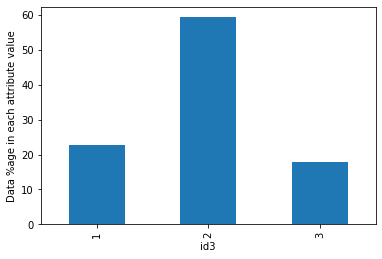

In [14]:
ax = analyse["Data Distribution"].plot(kind="bar")
ax.set_ylabel("Data %age in each attribute value")

Text(0, 0.5, 'Percentage of Abnormal Failures')

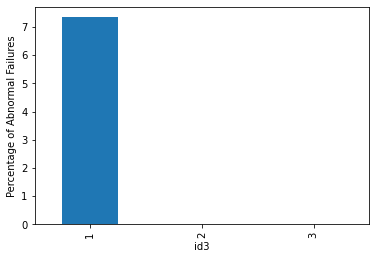

In [15]:
ax = analyse["Abnormal"].plot(kind="bar")
ax.set_ylabel("Percentage of Abnormal Failures")

## id4

In [16]:
col = "id4"
analyse = df[[col, "Abnormal"]].groupby(col).mean() * 100
analyse["Data Distribution"] = df[[col, "Abnormal"]].groupby(col).count()/len(df) * 100
analyse

,Abnormal,Data Distribution
id4,,
0,0.000000,21.727235
1,0.000000,24.606331
2,0.000000,12.001756
3,0.000000,5.974654
4,0.000000,1.145724
5,0.000000,5.096108
6,0.000000,0.672075
7,1.034812,6.071363
8,11.030413,14.645171


Text(0, 0.5, 'Data %age in each attribute value')

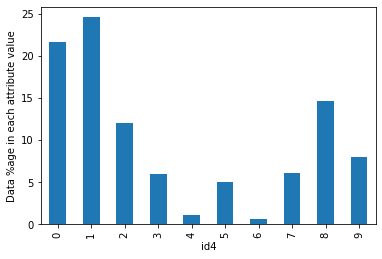

In [17]:
ax = analyse["Data Distribution"].plot(kind="bar")
ax.set_ylabel("Data %age in each attribute value")

Text(0, 0.5, 'Percentage of Abnormal Failures')

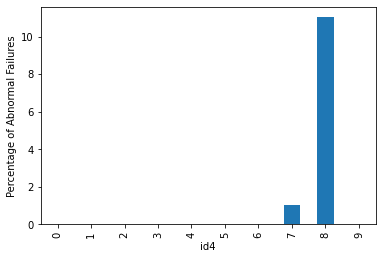

In [18]:
ax = analyse["Abnormal"].plot(kind="bar")
ax.set_ylabel("Percentage of Abnormal Failures")

## id5

In [19]:
col = "id5"
analyse = df[[col, "Abnormal"]].groupby(col).mean() * 100
analyse["Data Distribution"] = df[[col, "Abnormal"]].groupby(col).count()/len(df) * 100
analyse

,Abnormal,Data Distribution
id5,,
0,0.000209,11.540413
1,0.001541,14.062604
2,0.030475,11.852623
3,0.002217,6.518161
4,0.000000,11.183509
5,17.308702,9.309914
6,0.000000,2.816605
7,0.000000,13.335359
8,1.214929,4.043457


Text(0, 0.5, 'Data %age in each attribute value')

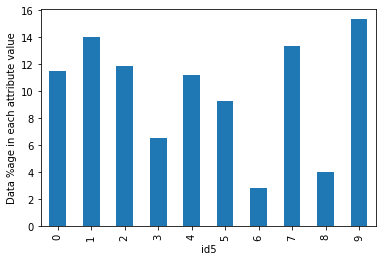

In [20]:
ax = analyse["Data Distribution"].plot(kind="bar")
ax.set_ylabel("Data %age in each attribute value")

Text(0, 0.5, 'Percentage of Abnormal Failures')

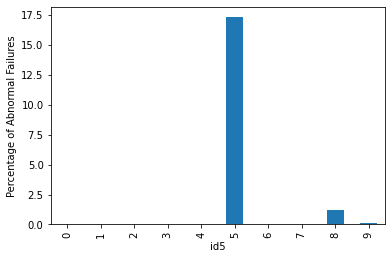

In [21]:
ax = analyse["Abnormal"].plot(kind="bar")
ax.set_ylabel("Percentage of Abnormal Failures")

## id6

In [22]:
col = "id6"
analyse = df[[col, "Abnormal"]].groupby(col).mean() * 100
analyse["Data Distribution"] = df[[col, "Abnormal"]].groupby(col).count()/len(df) * 100
analyse

,Abnormal,Data Distribution
id6,,
0,0.000000,8.399654
1,0.001120,8.603644
2,0.000000,7.301057
3,8.325159,9.083481
4,6.886917,12.419657
5,0.075551,8.892736
6,0.166777,14.785539
7,0.008102,13.672926
8,0.385763,8.833039


Text(0, 0.5, 'Data %age in each attribute value')

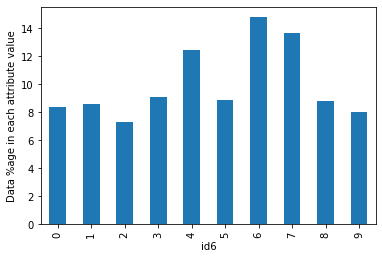

In [23]:
ax = analyse["Data Distribution"].plot(kind="bar")
ax.set_ylabel("Data %age in each attribute value")

Text(0, 0.5, 'Percentage of Abnormal Failures')

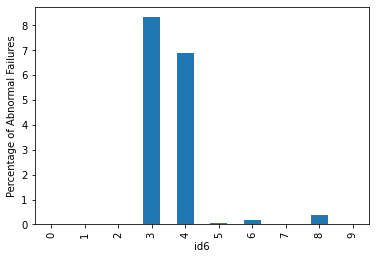

In [24]:
ax = analyse["Abnormal"].plot(kind="bar")
ax.set_ylabel("Percentage of Abnormal Failures")

## id7

In [25]:
col = "id7"
analyse = df[[col, "Abnormal"]].groupby(col).mean() * 100
analyse["Data Distribution"] = df[[col, "Abnormal"]].groupby(col).count()/len(df) * 100
analyse

,Abnormal,Data Distribution
id7,,
0,1.566889,10.055702
1,1.673891,9.644519
2,1.549164,10.145885
3,1.425985,10.625457
4,1.833442,8.463734
5,2.027937,9.050827
6,1.684806,10.558247
7,1.734059,10.152820
8,1.508416,11.234151


Text(0, 0.5, 'Data %age in each attribute value')

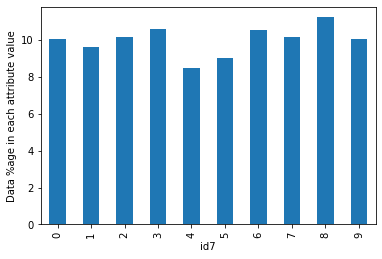

In [26]:
ax = analyse["Data Distribution"].plot(kind="bar")
ax.set_ylabel("Data %age in each attribute value")

Text(0, 0.5, 'Percentage of Abnormal Failures')

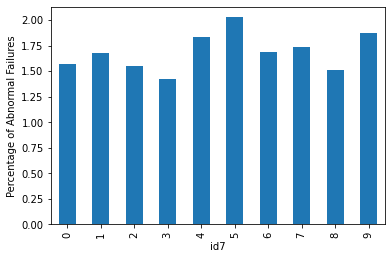

In [27]:
ax = analyse["Abnormal"].plot(kind="bar")
ax.set_ylabel("Percentage of Abnormal Failures")

## id8

In [28]:
col = "id8"
analyse = df[[col, "Abnormal"]].groupby(col).mean() * 100
analyse["Data Distribution"] = df[[col, "Abnormal"]].groupby(col).count()/len(df) * 100
analyse

,Abnormal,Data Distribution
id8,,
0,1.616957,9.984109
1,1.700091,10.124790
2,1.515572,10.661530
3,1.519893,10.480706
4,1.642826,10.329671
5,1.693772,10.817984
6,1.691645,9.685650
7,1.706223,9.492809
8,1.901957,8.985616


Text(0, 0.5, 'Data %age in each attribute value')

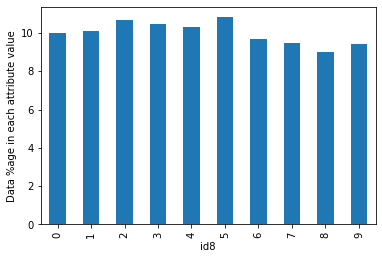

In [29]:
ax = analyse["Data Distribution"].plot(kind="bar")
ax.set_ylabel("Data %age in each attribute value")

Text(0, 0.5, 'Percentage of Abnormal Failures')

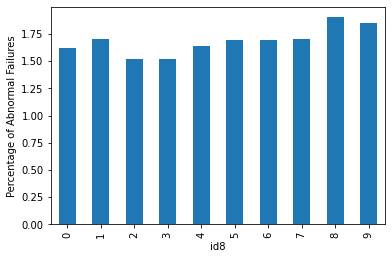

In [30]:
ax = analyse["Abnormal"].plot(kind="bar")
ax.set_ylabel("Percentage of Abnormal Failures")

## id9

In [31]:
col = "id9"
analyse = df[[col, "Abnormal"]].groupby(col).mean() * 100
analyse["Data Distribution"] = df[[col, "Abnormal"]].groupby(col).count()/len(df) * 100
analyse

,Abnormal,Data Distribution
id9,,
0,1.629122,9.967204
1,1.722339,10.017774
2,1.758735,10.044600
3,1.634241,10.056809
4,1.611917,10.000388
5,1.614129,9.983700
6,1.662481,10.029381
7,1.768078,9.879838
8,1.752482,9.985626


Text(0, 0.5, 'Data %age in each attribute value')

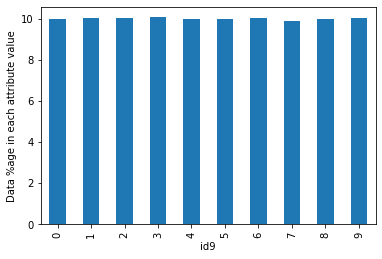

In [32]:
ax = analyse["Data Distribution"].plot(kind="bar")
ax.set_ylabel("Data %age in each attribute value")

Text(0, 0.5, 'Percentage of Abnormal Failures')

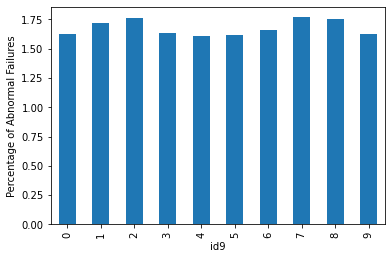

In [33]:
ax = analyse["Abnormal"].plot(kind="bar")
ax.set_ylabel("Percentage of Abnormal Failures")

## id10

In [34]:
col = "id10"
analyse = df[[col, "Abnormal"]].groupby(col).mean() * 100
analyse["Data Distribution"] = df[[col, "Abnormal"]].groupby(col).count()/len(df) * 100
analyse

,Abnormal,Data Distribution
id10,,
0,1.685113,10.001857
1,1.672486,9.999617
2,1.680152,9.958294
3,1.689047,9.994247
4,1.674643,9.982423
5,1.672450,10.028635
6,1.674168,10.015462
7,1.679667,10.002748
8,1.684210,10.011513


Text(0, 0.5, 'Data %age in each attribute value')

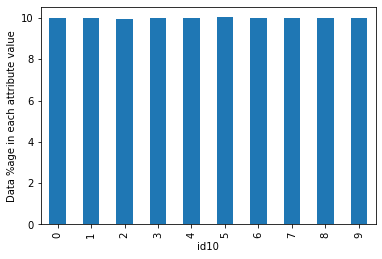

In [35]:
ax = analyse["Data Distribution"].plot(kind="bar")
ax.set_ylabel("Data %age in each attribute value")

Text(0, 0.5, 'Percentage of Abnormal Failures')

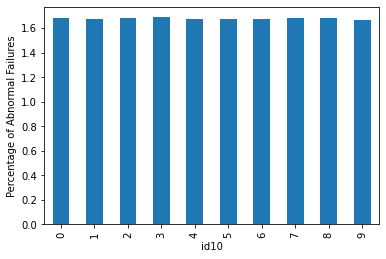

In [36]:
ax = analyse["Abnormal"].plot(kind="bar")
ax.set_ylabel("Percentage of Abnormal Failures")

## Code0

In [37]:
col = "Code0"
analyse = df[[col, "Abnormal"]].groupby(col).mean() * 100
analyse["Data Distribution"] = df[[col, "Abnormal"]].groupby(col).count()/len(df) * 100
analyse

,Abnormal,Data Distribution
Code0,,
,0.000000,0.006935
NULL,0.000000,2.141977
R00,0.083967,1.835450
R01,0.092747,1.661706
R02,0.047908,3.216975
...,...,...
R74,0.000000,0.358951
R75,0.000000,0.279724
R76,0.000000,0.449038


Text(0, 0.5, 'Data %age in each attribute value')

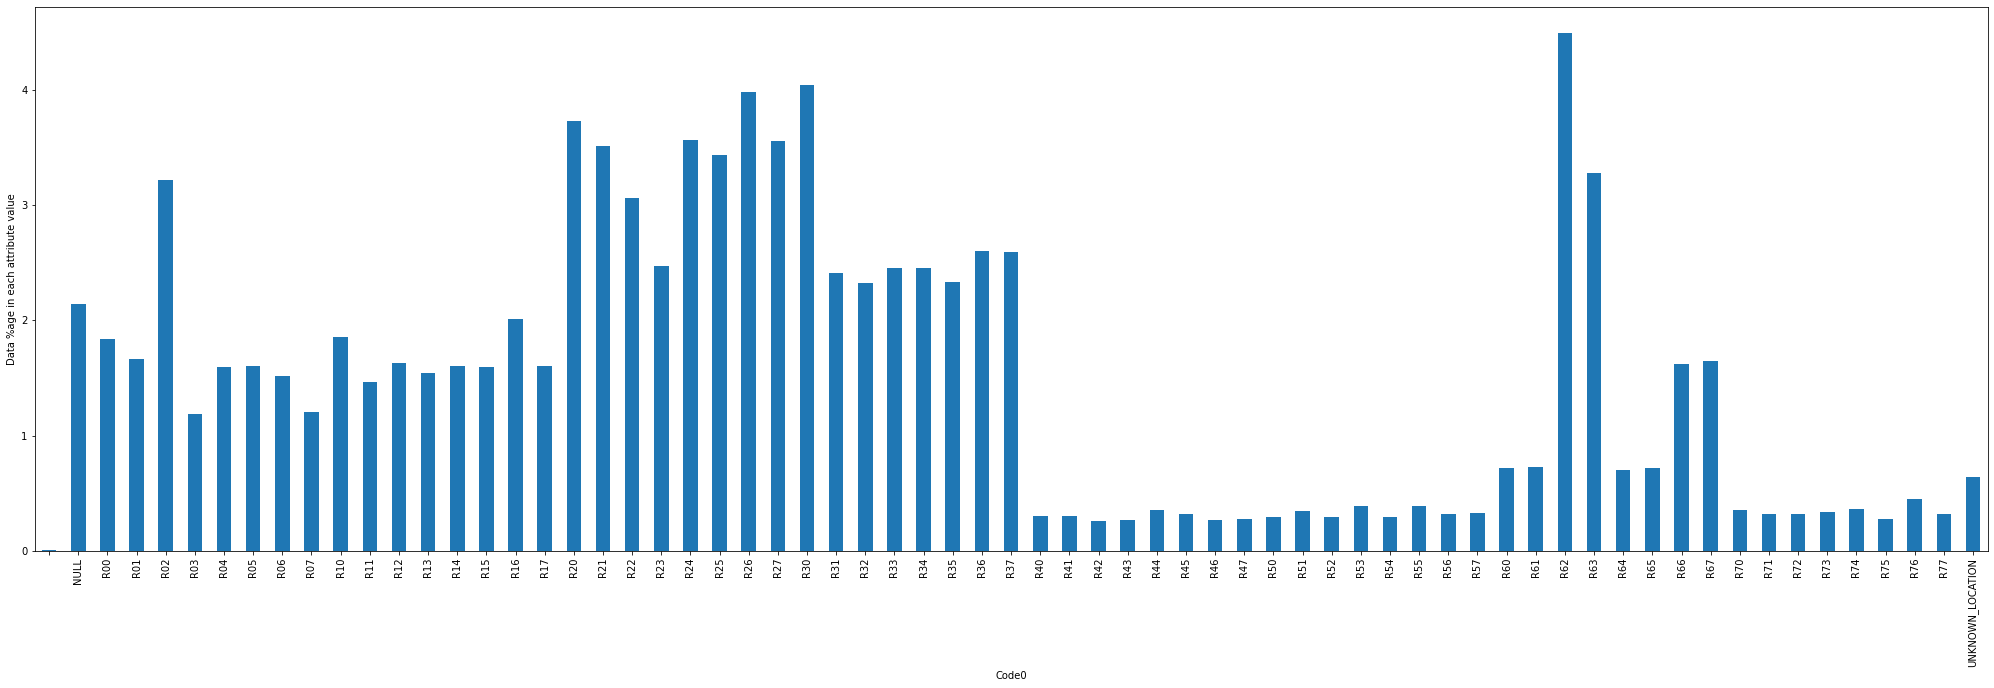

In [38]:
ax = analyse["Data Distribution"].plot(kind="bar", figsize=(35, 10))
ax.set_ylabel("Data %age in each attribute value")

Text(0, 0.5, 'Percentage of Abnormal Failures')

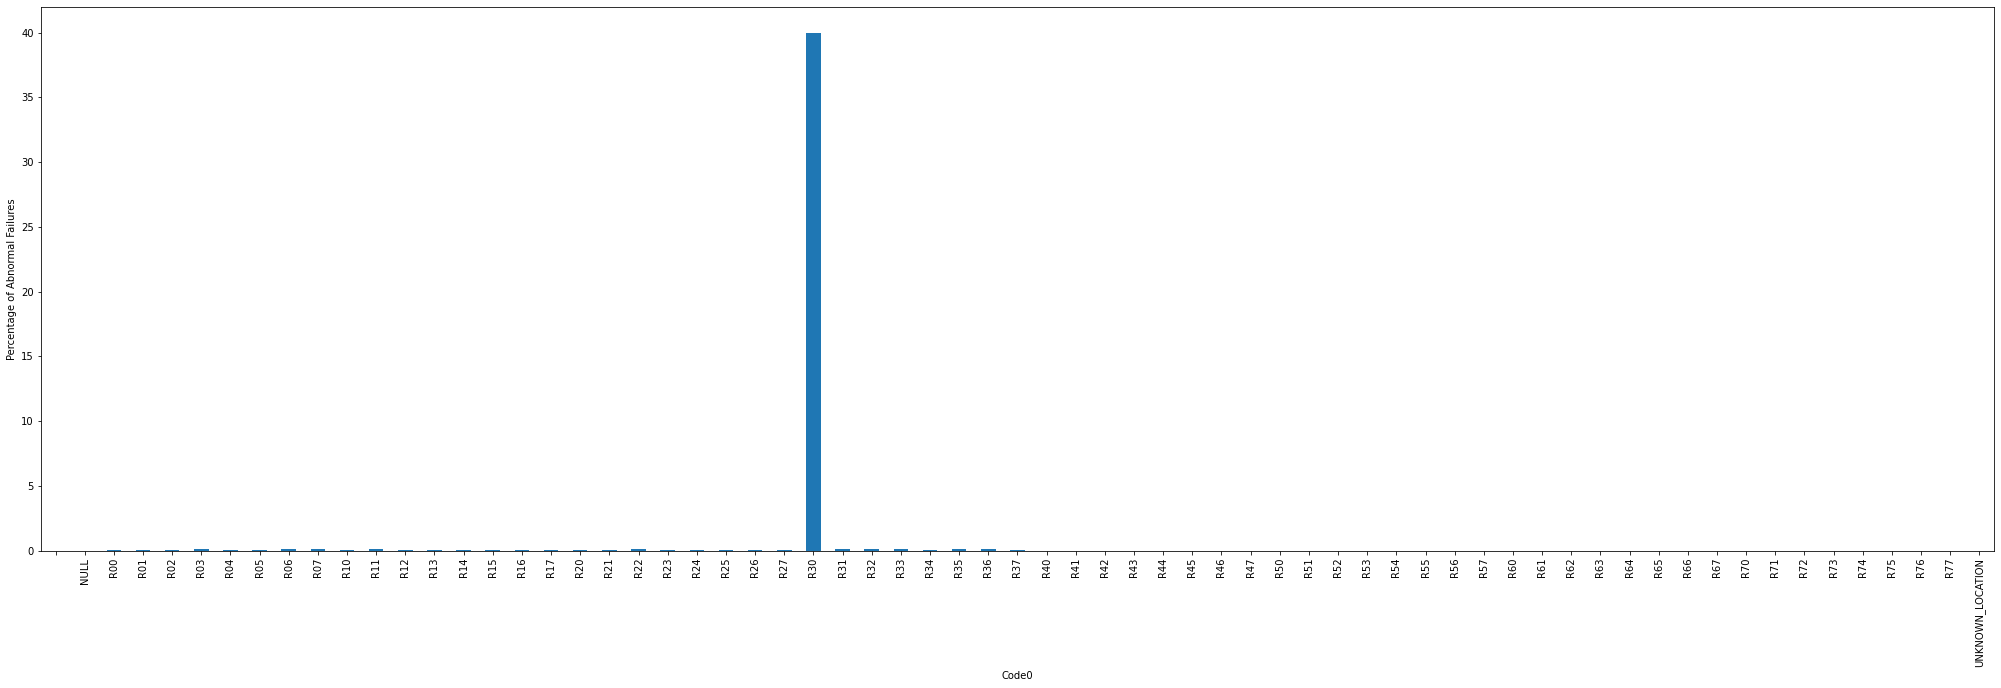

In [39]:
ax = analyse["Abnormal"].plot(kind="bar", figsize=(35, 10))
ax.set_ylabel("Percentage of Abnormal Failures")

## Code1

In [40]:
col = "Code1"
analyse = df[[col, "Abnormal"]].groupby(col).mean() * 100
analyse["Data Distribution"] = df[[col, "Abnormal"]].groupby(col).count()/len(df) * 100
analyse

,Abnormal,Data Distribution
Code1,,
,0.000000,0.006935
M0,3.183853,51.709134
M1,0.070125,45.500822


Text(0, 0.5, 'Data %age in each attribute value')

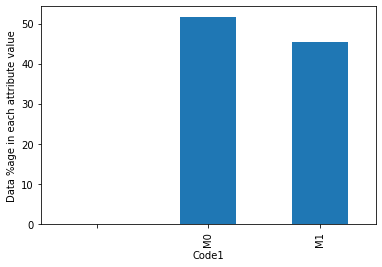

In [41]:
ax = analyse["Data Distribution"].plot(kind="bar")
ax.set_ylabel("Data %age in each attribute value")

Text(0, 0.5, 'Percentage of Abnormal Failures')

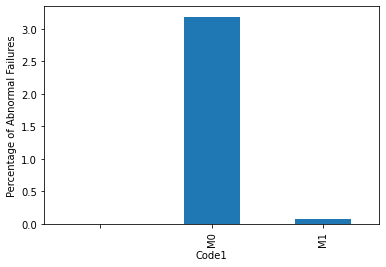

In [42]:
ax = analyse["Abnormal"].plot(kind="bar")
ax.set_ylabel("Percentage of Abnormal Failures")

## Code2

In [43]:
col = "Code2"
analyse = df[[col, "Abnormal"]].groupby(col).mean() * 100
analyse["Data Distribution"] = df[[col, "Abnormal"]].groupby(col).count()/len(df) * 100
analyse

,Abnormal,Data Distribution
Code2,,
L0,0.000000,0.020108
L1,0.000000,0.016255
L2,0.000000,0.022684
L3,0.000000,0.029403
N0,0.175462,8.028735
N1,0.017664,5.589310
N2,0.012406,6.017422
N3,0.017532,5.769027
N4,0.212516,6.424871


Text(0, 0.5, 'Data %age in each attribute value')

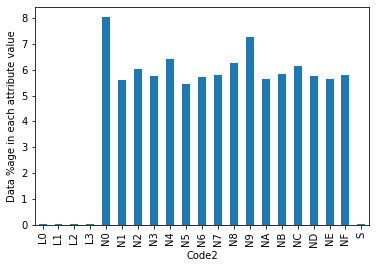

In [44]:
ax = analyse["Data Distribution"].plot(kind="bar")
ax.set_ylabel("Data %age in each attribute value")

Text(0, 0.5, 'Percentage of Abnormal Failures')

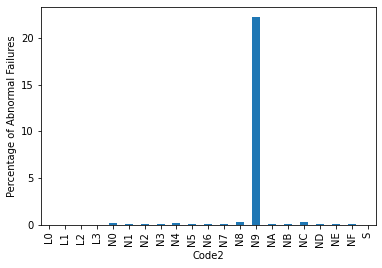

In [45]:
ax = analyse["Abnormal"].plot(kind="bar")
ax.set_ylabel("Percentage of Abnormal Failures")

## Code3

In [46]:
col = "Code3"
analyse = df[[col, "Abnormal"]].groupby(col).mean() * 100
analyse["Data Distribution"] = df[[col, "Abnormal"]].groupby(col).count()/len(df) * 100
analyse

,Abnormal,Data Distribution
Code3,,
C:J02,0.017400,5.397506
C:J03,0.025623,5.169001
C:J04,0.016905,5.555356
C:J05,0.018561,5.189663
C:J06,0.019013,5.319387
C:J07,0.014992,5.621820
C:J08,0.015550,5.265422
C:J09,0.023449,5.340241
C:J10,0.016160,5.364563


Text(0, 0.5, 'Data %age in each attribute value')

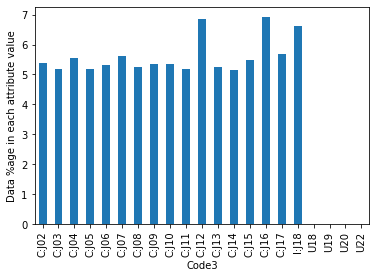

In [47]:
ax = analyse["Data Distribution"].plot(kind="bar")
ax.set_ylabel("Data %age in each attribute value")

Text(0, 0.5, 'Percentage of Abnormal Failures')

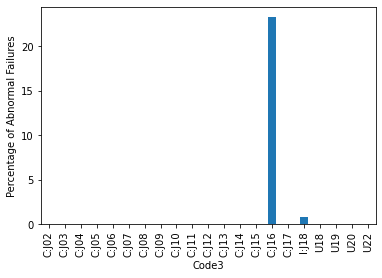

In [48]:
ax = analyse["Abnormal"].plot(kind="bar")
ax.set_ylabel("Percentage of Abnormal Failures")

## Code4

In [49]:
col = "Code4"
analyse = df[[col, "Abnormal"]].groupby(col).mean() * 100
analyse["Data Distribution"] = df[[col, "Abnormal"]].groupby(col).count()/len(df) * 100
analyse

,Abnormal,Data Distribution
Code4,,
C,0.000000,0.023214
U01,3.452238,47.705193
U11,0.065749,47.686434


Text(0, 0.5, 'Data %age in each attribute value')

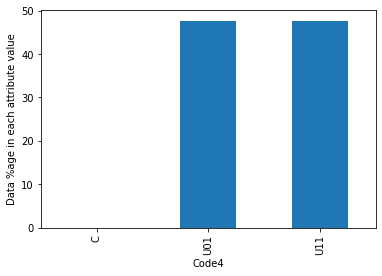

In [50]:
ax = analyse["Data Distribution"].plot(kind="bar")
ax.set_ylabel("Data %age in each attribute value")

Text(0, 0.5, 'Percentage of Abnormal Failures')

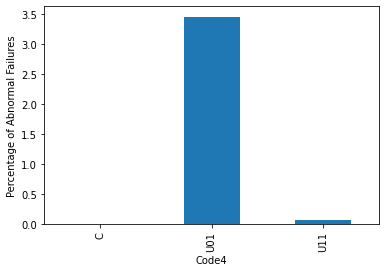

In [51]:
ax = analyse["Abnormal"].plot(kind="bar")
ax.set_ylabel("Percentage of Abnormal Failures")

## ErrorLoc

In [52]:
col = "ErrorLoc"
analyse = df[[col, "Abnormal"]].groupby(col).mean() * 100
analyse["Data Distribution"] = df[[col, "Abnormal"]].groupby(col).count()/len(df) * 100
analyse

,Abnormal,Data Distribution
ErrorLoc,,
.²Ð1}ÐDÝC`)ÙpDÝCpDÝC@DÝC@RAS,0.000000,0.000048
.²ÐFÇiDÝC`)ÙpDÝCpDÝC@DÝC@RAS,0.000000,0.000048
.²ÐM·q8Oïã`)ÙpOïãpOïã@Oïã@RAS,0.000000,0.000096
NULLCMCS,0.000000,0.004286
NULLDISCOVERY,0.000000,2.284175
NULLHARDWARE,0.000000,0.107594
NULLMONITOR,0.000000,0.040119
NULLSERV_NET,0.000000,0.000072
RASAPP,1.476861,3.528510


Text(0, 0.5, 'Data %age in each attribute value')

/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 15 () missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 16 () missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 152 (\x98) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 15 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 16 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 152 (\x98) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


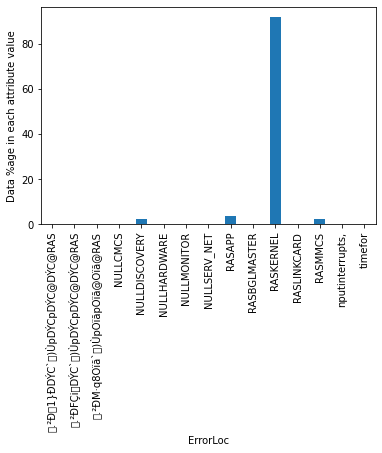

In [53]:
ax = analyse["Data Distribution"].plot(kind="bar")
ax.set_ylabel("Data %age in each attribute value")

Text(0, 0.5, 'Percentage of Abnormal Failures')

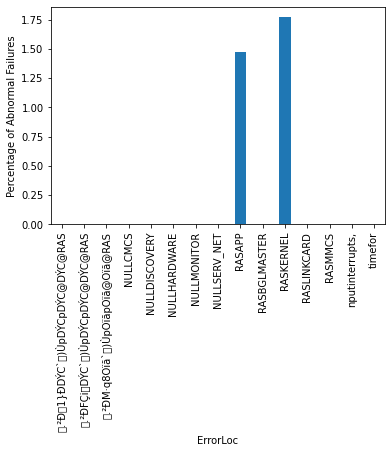

In [54]:
ax = analyse["Abnormal"].plot(kind="bar")
ax.set_ylabel("Percentage of Abnormal Failures")

## ErrorType

In [55]:
col = "ErrorType"
analyse = df[[col, "Abnormal"]].groupby(col).mean() * 100
analyse["Data Distribution"] = df[[col, "Abnormal"]].groupby(col).count()/len(df) * 100
analyse

,Abnormal,Data Distribution
ErrorType,,
0,0.000000,0.000048
ERROR,0.000000,2.694081
FAILURE,0.000000,0.039782
FATAL,12.682272,13.233039
INFO,0.000000,83.046501
KERNEL,0.000000,0.000193
SEVERE,0.000000,0.451446
WARNING,0.000000,0.534862
a,0.000000,0.000048


Text(0, 0.5, 'Data %age in each attribute value')

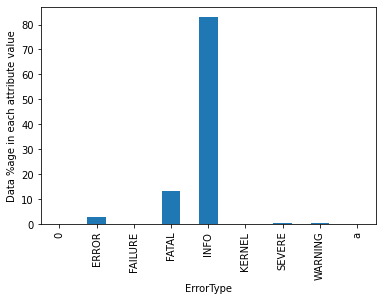

In [56]:
ax = analyse["Data Distribution"].plot(kind="bar")
ax.set_ylabel("Data %age in each attribute value")

Text(0, 0.5, 'Percentage of Abnormal Failures')

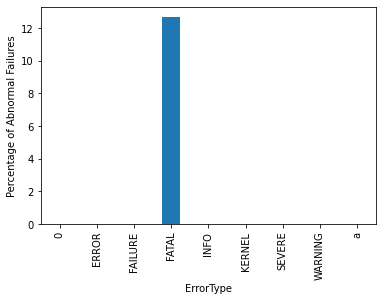

In [57]:
ax = analyse["Abnormal"].plot(kind="bar")
ax.set_ylabel("Percentage of Abnormal Failures")